
# 🧭 Introduction

This project focuses on analyzing retail sales data between 2016 and 2019 to uncover insights that can drive data-informed decisions for product performance and store efficiency.

The analysis follows a structured workflow, beginning with data extraction and cleaning, followed by exploratory data analysis (EDA), manipulation, and visualization. All data processing and transformations were conducted using Python, primarily leveraging libraries such as pandas, numpy, matplotlib, and seaborn.

## 🧱 Objectives

Data Extraction & Cleaning: Load the dataset and apply preliminary cleaning steps, such as handling missing values and formatting date/time columns.

Data Analysis: Identify the top-selling item per ZIP code and compute each store's share of total sales between 2016 and 2019.

Data Visualization: Display the findings through clear, informative visualizations using matplotlib and seaborn, ensuring that results are both aesthetic and actionable.

Reporting: Summarize methods, analysis steps, and conclusions in a concise report alongside the supporting code and visual output.

## 🧪 Scope & Constraints

All computations are performed via Python scripts — no manual manipulation of data.

The final output includes:

A Jupyter Notebook containing the full analysis.

Clean and focused visualizations designed to communicate the most important insights effectively.

A github repository.


In [2]:
#import my libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from IPython.core.pylabtools import figsize

In [3]:
#insert the csv file

df = pd.read_csv('https://storage.googleapis.com/courses_data/Assignment%20CSV/finance_liquor_sales.csv')

In [4]:
#Clean missing values

df.dropna(inplace=True)

In [5]:
#Clean duplicates

df.drop_duplicates()

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,...,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
0,INV-31797900035,2020-11-10,4967,Jeff's Market / Blue Grass,"102, W Mayne St",Blue Grass,52726.0,POINT (-90.766126 41.509119),82.0,SCOTT,...,26858,Templeton 4YR Rye,12,375,9.99,14.99,1,14.99,0.37,0.09
1,INV-23548800092,2019-11-27,2601,Hy-Vee Food Store / Fairfield,1300 West Burlington Ave,Fairfield,52556.0,POINT (-91.978702 41.006456),51.0,JEFFERSON,...,86251,Juarez Triple Sec,12,1000,2.42,3.63,6,21.78,6.00,1.58
3,INV-39482900037,2021-08-24,3719,Wal-Mart 0581 / Marshalltown,2802 S Center St,Marshalltown,50158.0,POINT (-92.91231 42.012918),64.0,MARSHALL,...,65259,Jagermeister Liqueur Mini Meisters,12,20,4.93,7.40,12,88.80,0.24,0.06
4,INV-39520400088,2021-08-25,5423,Stammer Liquor Corp,615 2nd Ave,Sheldon,51201.0,POINT (-95.854899 43.184242),71.0,OBRIEN,...,77487,Tortilla Gold DSS,12,1000,4.85,7.28,4,29.12,4.00,1.05
5,INV-29941700050,2020-09-02,3842,Bancroft Liquor Store,107 N Portland St Po Bx 222,Bancroft,50517.0,POINT (-94.218 43.29355),55.0,KOSSUTH,...,77055,Sir Winston Peach,6,750,13.01,19.52,18,351.36,13.50,3.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,INV-08632500071,2017-11-14,3385,Sam's Club 8162 / Cedar Rapids,2605 Blairs Ferry Rd NE,Cedar Rapids,52402.0,POINT (-91.67969 42.031819),57.0,LINN,...,86390,Montezuma Triple Sec,12,1000,2.13,3.20,216,691.20,216.00,57.06
195,INV-28352300005,2020-06-29,5292,John's Qwik Stop,"814, C Ave",Vinton,52349.0,POINT (-92.027865 42.163119),6.0,BENTON,...,43038,Bacardi Gold,6,1750,15.00,22.50,3,67.50,5.25,1.38
196,INV-33910800023,2021-01-29,2644,Hy-Vee Fort Dodge Wine and Spirits,1511 2nd Ave North,Fort Dodge,50501.0,POINT (-94.177165 42.508344),94.0,WEBSTER,...,101217,Captain Morgan OSR PET 6/1.75l w/ 50ml CM Sli...,6,1750,18.00,27.00,156,4212.00,273.00,72.11
197,S30234800064,2016-01-15,4829,Central City 2,1501 MICHIGAN AVE,DES MOINES,50314.0,POINT (-93.613739 41.60572),77.0,Polk,...,86251,Juarez Triple Sec,12,1000,2.42,3.63,60,217.80,60.00,15.85


In [6]:
#Convert date column to date format so we can slice sales for years 2016-2019

df['date'] = pd.to_datetime(df['date'])

Created a dataframe to display the predominant item per zipcode and calculating the proportion of sales for each store between 2016 and 2019.

In [7]:
filtered = df[(df['date'] >= '2016-01-01') & (df['date'] <= '2019-12-31')]

#Checking my column types
filtered.info()


<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 1 to 197
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   invoice_and_item_number  60 non-null     object        
 1   date                     60 non-null     datetime64[ns]
 2   store_number             60 non-null     int64         
 3   store_name               60 non-null     object        
 4   address                  60 non-null     object        
 5   city                     60 non-null     object        
 6   zip_code                 60 non-null     float64       
 7   store_location           60 non-null     object        
 8   county_number            60 non-null     float64       
 9   county                   60 non-null     object        
 10  category                 60 non-null     float64       
 11  category_name            60 non-null     object        
 12  vendor_number            60 non-null     f

Here I will change the item_number type to string so I can use it smoothly on my graph,later.

In [8]:
filtered['item_number'] = filtered['item_number'].astype(str)

C:\Users\hulkm\AppData\Local\Temp\ipykernel_5452\1715988005.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['item_number'] = filtered['item_number'].astype(str)


I created a Sample to check zip_code sales.

In [9]:
sales = filtered.groupby(['zip_code','item_number'])['bottles_sold'].sum().reset_index()
sales.sort_values('bottles_sold', ascending=False).head(10)

,zip_code,item_number,bottles_sold
47,52314.0,75087,1560
20,50702.0,77487,768
0,50010.0,946574,288
8,50314.0,86251,240
27,51106.0,67527,240
50,52402.0,86390,216
22,50703.0,168,180
29,51106.0,86251,144
12,50320.0,973627,120
17,50501.0,38176,108


**Continuing, I will apply my data exploration skills to generate visualizations that support data-driven decision-making for our productsFurthermore I will use my exploration
skills to display graphs , I think are useful to take data driven decisions for our products.**

Next we will create a graph to check our top 10 selling items based on sales in dollars.
I used item number instead of item description because the item description data was to big to fit aesthetically well on x axis.


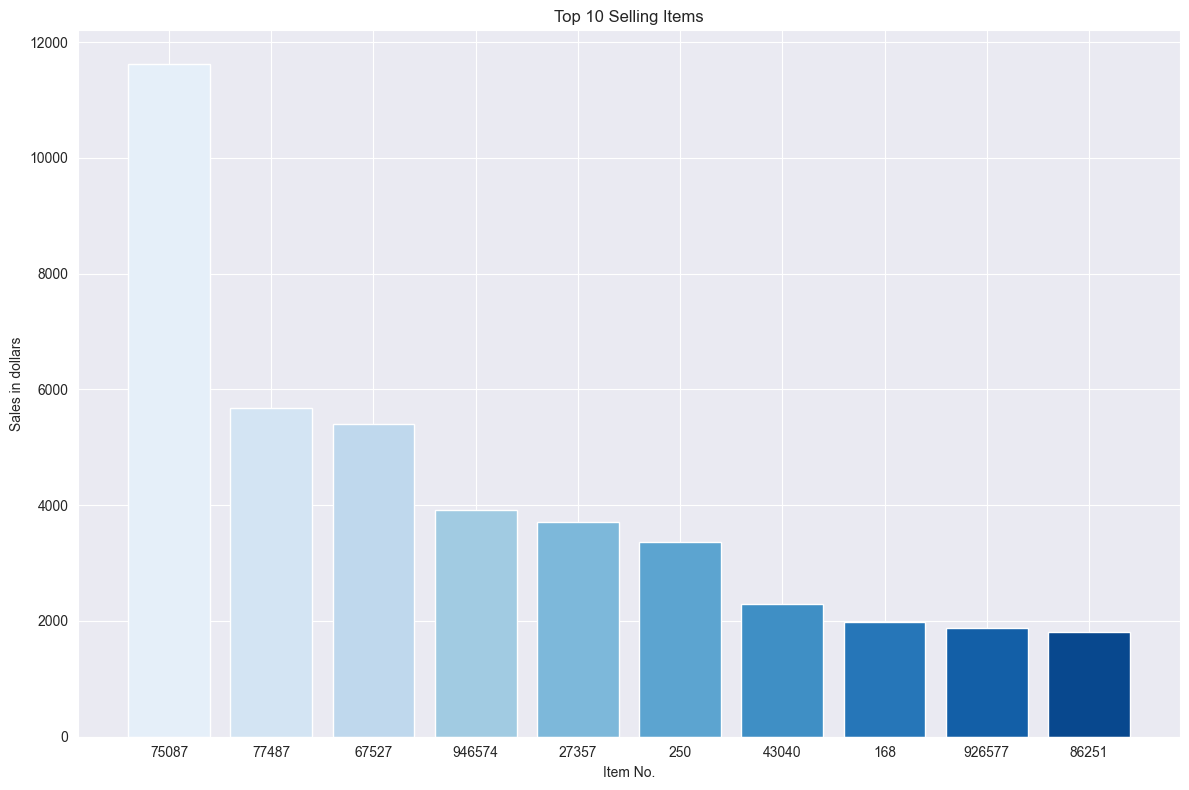

In [26]:
#group and aggregate the data in descending to get the top 10 items.
top10 = filtered.groupby('item_number')['sale_dollars'].sum().sort_values(ascending=False)[:10]

top10df = top10.reset_index()


#plot the bar chart
colors = sns.color_palette("Blues", 10)

plt.figure(figsize=(12, 8))
plt.bar(top10df['item_number'], top10df['sale_dollars'], color=colors)
plt.xlabel('Item No.')
plt.ylabel('Sales in dollars')
plt.title('Top 10 Selling Items')
plt.tight_layout()
plt.grid(color='white')
plt.show()


### Conclusions :
1. Item 75087 leads by a massive margin  nearly double the sales of the second-highest item. That’s a strong signal it’s a top-performing or best-selling product, possibly a flagship or a seasonal/high-demand item.
2. Every item in the top 10 generated more than $2,000 in sales, indicating a solid group of consistently demanded products.

Next I will create a df to show the top scoring store locations by percentage of sales.



In [28]:
#group sales by store location
store_sales = filtered.groupby('store_name')['sale_dollars'].sum().reset_index()

#calculate percentage of total sales
total_sales = store_sales['sale_dollars'].sum()
store_sales['percent_sales'] = (store_sales['sale_dollars'] / total_sales) * 100

store_sales = store_sales.sort_values('percent_sales', ascending=False)

store_sales.head(10)

,store_name,sale_dollars,percent_sales
49,Wilkie Liquors,11620.80,20.541781
41,Sam's Club 6432 / Sioux City,6641.04,11.739191
42,Sam's Club 6514 / Waterloo,5199.36,9.190771
14,Hy-Vee #3 / BDI / Des Moines,4124.04,7.289957
43,Sam's Club 6568 / Ames,3913.92,6.918533
2,Cedar Ridge Vineyards,3712.50,6.562488
32,Hy-Vee Wine and Spirits / WDM,3372.30,5.961126
8,Fareway Stores #138 / Pleasant Hill,2295.00,4.056811
19,Hy-Vee Food Store #2 / Waterloo,1992.15,3.521471
24,Hy-Vee Food Store / Fort Dodge,1563.84,2.764359


Our graph can be displayed like this.

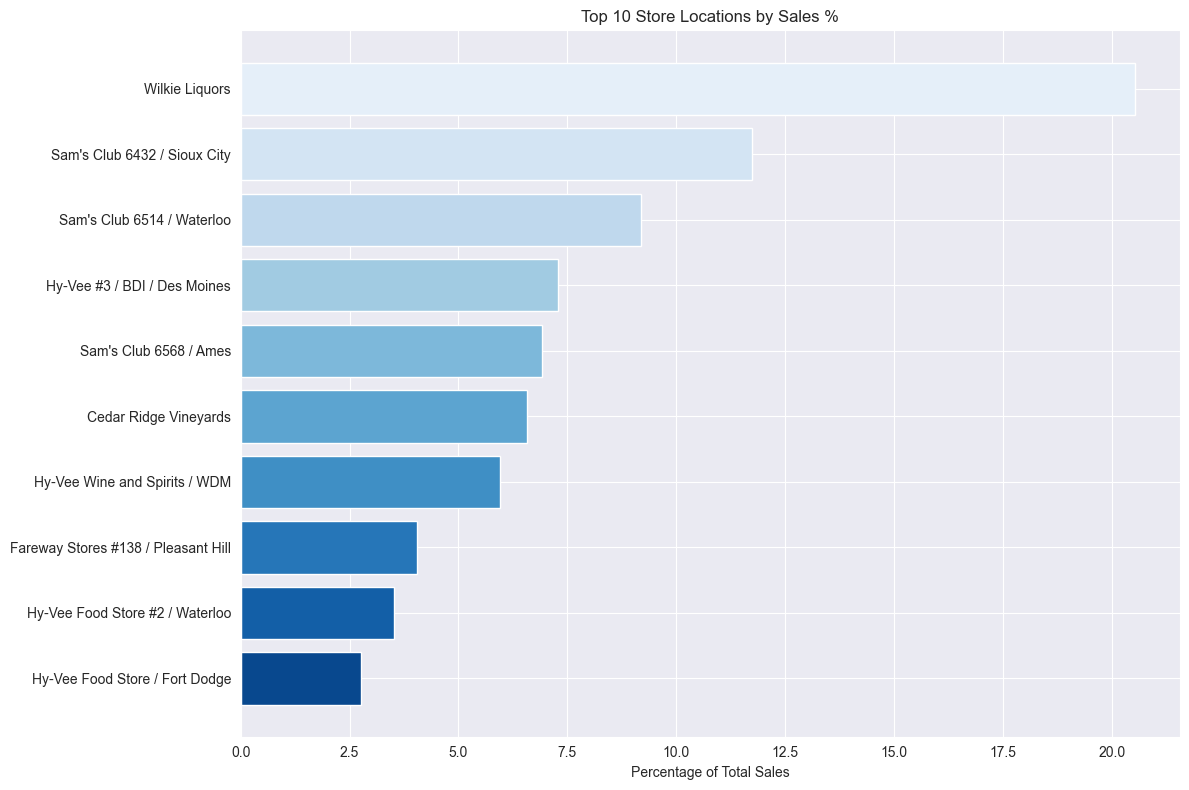

In [29]:
top_stores = store_sales.head(10)
colors = sns.color_palette("Blues", 10)

plt.figure(figsize=(12, 8))
plt.barh(top_stores['store_name'], top_stores['percent_sales'], color= colors)
plt.xlabel('Percentage of Total Sales')
plt.title(f'Top {10} Store Locations by Sales %')
plt.gca().invert_yaxis()  # Highest at the top
plt.tight_layout()
plt.grid(color='white')
plt.show()

### Conclusions :
1. With over 20% of total sales attributed to one store, Wilkie Liquors is clearly a dominant retail channel. It either benefits from a strong customer base, a prime location, or broader product availability.
2. Wilkie Liquors, Sam’s Club Sioux City, and Sam’s Club Waterloo together likely account for ~40%+ of total sales, emphasizing sales concentration in a few high-performing locations.

### Key Takeaways :

**Product Strategy**: Focus marketing and stock efforts around item 75087, and investigate what makes it outperform others is it pricing, promotions, packaging or seasonality?

**Store Optimization**: Target top-performing stores like Wilkie Liquors with priority stock allocation, exclusive bundles, or loyalty campaigns. Look into what makes it so successful. If a bunch of stores is creating the most revenue it could be worth reallocating stock.